In [1]:
#Add 'Magic' command  
%matplotlib inline

#import dependacies
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Files to load
city_data='Resources/city_data.csv'
ride_data='Resources/ride_data.csv'

#create DatFrame with City Data file
city_data_df=pd.read_csv(city_data)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [3]:
#create DatFrame with City Data file
ride_data_df=pd.read_csv(ride_data)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12


In [4]:
#check for missing values in city data
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [5]:
#check for missing values in ride data
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [6]:
##check for duplicated values in city data
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [8]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [9]:
# Get the unique values of the type of city.
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Get the number of data points from the Urban cities.
sum(city_data_df['type']=='Urban')

66

In [11]:
# Combine the data into a single dataset
pyber_data_df=pd.merge(ride_data_df, city_data_df, how='left', on=['city', 'city'])

# Display the DataFrame
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12,10,Urban
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11,44,Urban
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11,21,Urban
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12,4,Urban
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12,33,Urban


In [12]:
# Create the Urban city DataFrame
urban_cities_df=pyber_data_df[pyber_data_df['type']=='Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [13]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df['type']=='Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type']=='Rural']
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4.018030e+12,2,Rural


In [14]:
# Get the number of rides for urban cities.
urban_ride_count=urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [15]:
# Create the suburban ride count.
suburban_ride_count=suburban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [16]:
## Create the rural ride count.
rural_ride_count=rural_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [17]:
#Average fare per Urban city
urban_avg_fare=urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [18]:
#Average fare per Suburban city
suburban_avg_fare=suburban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [19]:
#Average fare per Rural city
rural_avg_fare=rural_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [20]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [21]:
# Get the average number of drivers for each Suburban city.
suburban_driver_count= suburban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [22]:
# Get the average number of drivers for each rural city.
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

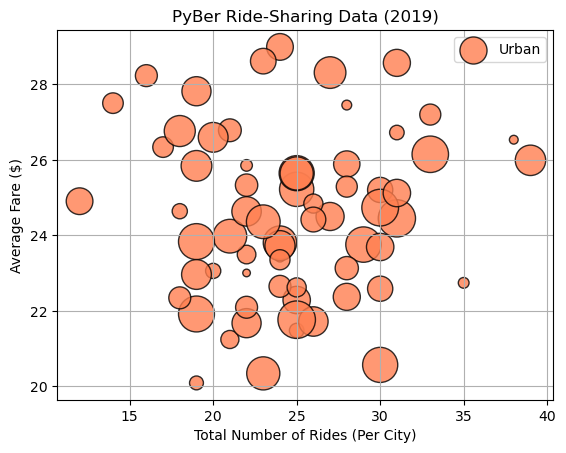

In [23]:
# Build the scatter plots for urban cities. (x, y, color of data, marker = size of driver count, title it Rural)
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            color='coral',
            edgecolor='black', linewidths=1,
            alpha=0.8,
            s=(urban_driver_count*10), 
            label='Urban')
#Add legend
plt.legend()
#Add title
plt.title('PyBer Ride-Sharing Data (2019)')
#Add Y-axis Label
plt.ylabel('Average Fare ($)')
#Add X-axis label
plt.xlabel('Total Number of Rides (Per City)')
#Add grid
plt.grid()
#Shpw scattper plot
plt.show()

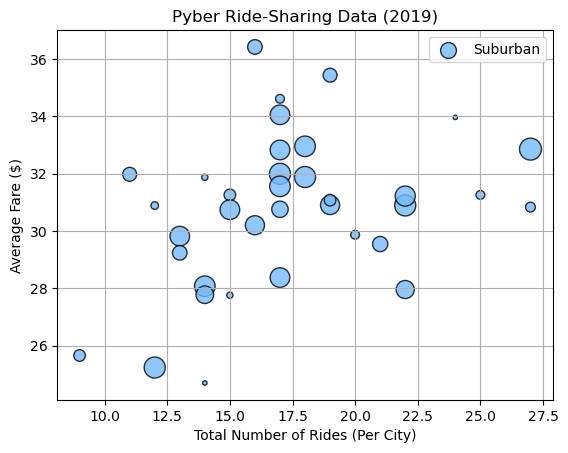

In [24]:
#Create Suburban scatter plot
plt.scatter(suburban_ride_count, suburban_avg_fare,
           color='xkcd:sky blue',
           edgecolor='black', linewidths=1,alpha=0.8,
           s=(10*suburban_driver_count),
           label='Suburban')
#Add title
plt.title('Pyber Ride-Sharing Data (2019)')
#Add legend
plt.legend()
#Add X-axis label
plt.xlabel('Total Number of Rides (Per City)')
#Add Y-axis label
plt.ylabel('Average Fare ($)')
#Add grid
plt.grid()
#Show scatter plot
plt.show()


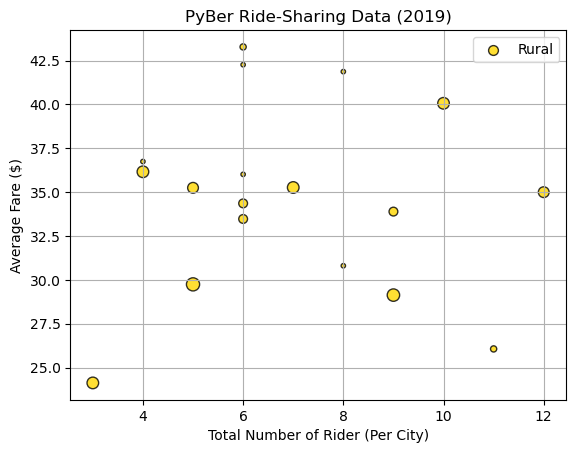

In [25]:
#Create Rural scatter plot
plt.scatter(rural_ride_count, rural_avg_fare,
           s=(10*rural_driver_count), 
            color='gold',alpha=0.8,
           edgecolor='black', linewidths=1,
            label='Rural')

#Add legend
plt.legend()
#Add X-axis label
plt.xlabel('Total Number of Rider (Per City)')
#Add Y-axis label
plt.ylabel('Average Fare ($)')
#Add title
plt.title('PyBer Ride-Sharing Data (2019)')
#Add grid
plt.grid()
#Show plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

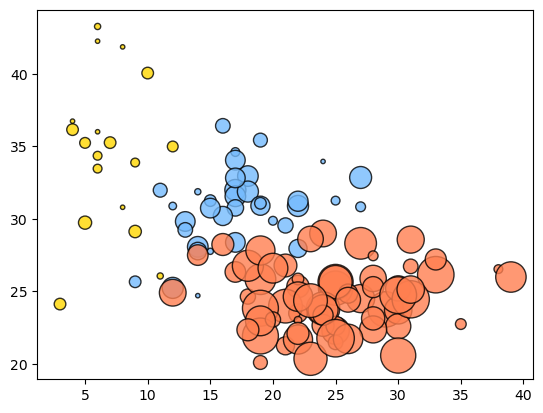

In [26]:
#Add all 3 plots to one cell to combine plots

#Add rural plot
plt.scatter(rural_ride_count, rural_avg_fare,
           s=(10*rural_driver_count), 
            color='gold',alpha=0.8,
           edgecolor='black', linewidths=1,
            label='Rural')

#Add suburban plot
plt.scatter(suburban_ride_count, suburban_avg_fare,
           color='xkcd:sky blue',
           edgecolor='black', linewidths=1,alpha=0.8,
           s=(10*suburban_driver_count),
           label='Suburban')

#Add urban plot
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            color='coral',
            edgecolor='black', linewidths=1,
            alpha=0.8,
            s=(urban_driver_count*10), 
            label='Urban')

#show plot
plt.show

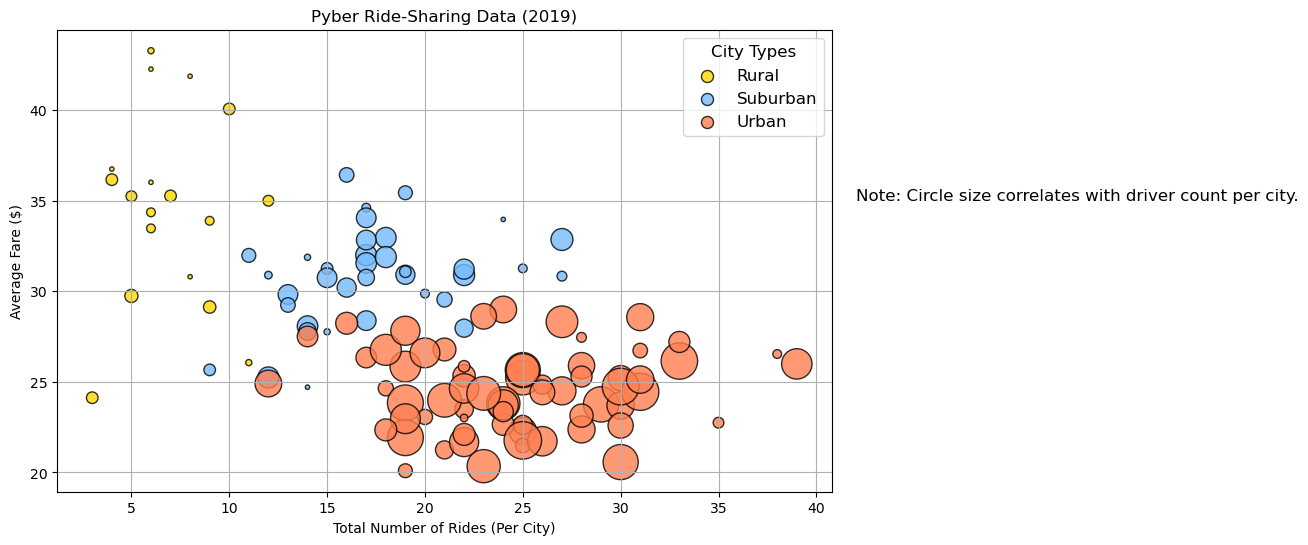

In [27]:
#Build the scatter charts for each city type
plt.subplots(figsize=(10,6))

#Add rural plot
plt.scatter(rural_ride_count, rural_avg_fare,
           s=(10*rural_driver_count), 
            color='gold',alpha=0.8,
           edgecolor='black', linewidths=1,
            label='Rural')

#Add suburban plot
plt.scatter(suburban_ride_count, suburban_avg_fare,
           color='xkcd:sky blue',
           edgecolor='black', linewidths=1,alpha=0.8,
           s=(10*suburban_driver_count),
           label='Suburban')

#Add urban plot
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            color='coral',
            edgecolor='black', linewidths=1,
            alpha=0.8,
            s=(urban_driver_count*10), 
            label='Urban')

# Incorporate the other graph properties
plt.title('Pyber Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid()

# Create a legend
lgnd = plt.legend(fontsize='12', mode='Expanded',
                 scatterpoints=1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#Let's break down what this code is doing for the legend:

#  1. We made the font size for the text "small" with fontsize=.
#  2. Then we expanded the legend horizontally using mode= to fit the area. 
#  3. We added the number of scatter points in the legend for each marker to be 1. 
#  4. The location setting, loc=, for the legend is where it will fit the "best" based on the plotting of the data points.
#  5. We added a legend title.
#  6. We set each marker in the legend equal to 75-point font by using the legendHandles[]._sizes attribute and list indexing in the brackets to reference one of the three scatter plots. 
#  7. Finally, we increased the font size of the legend title to 12.


# Incorporate a text label about circle size.
plt.text(42, 35, 'Note: Circle size correlates with driver count per city.', fontsize='12')

# Save the figure.
plt.savefig('Analysis/Fig1.png')

In [28]:
#gather statistic summary for urban cities
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400240e+12,22.000000
50%,24.640000,4.711190e+12,37.000000
75%,34.580000,7.451580e+12,52.000000
max,44.970000,9.991540e+12,73.000000


In [29]:
#gather statistic summary for suburban cities
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364250e+12,5.000000
50%,30.750000,5.053220e+12,16.000000
75%,39.830000,7.551670e+12,21.000000
max,49.960000,9.917740e+12,25.000000


In [30]:
#gather statistic summary for rural cities
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275360e+12,1.000000
50%,37.050000,4.023960e+12,4.000000
75%,47.070000,7.118050e+12,7.000000
max,58.550000,9.990580e+12,9.000000


In [31]:
# Get summary statistics.
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [32]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [33]:
#Calculate teh median for # of rides in urban cities
urban_ride_count.median()

24.0

In [34]:
suburban_ride_count.mode()

0    17
Name: ride_id, dtype: int64

In [35]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [36]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f'The mean for the ride counts for Urban trips is {mean_urban_ride_count:.2f}.')

median_urban_ride_count = np.median(urban_ride_count)
print(f'The median for the ride counts for Urban trips is {median_urban_ride_count}.')

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f'The mode for the ride counts for Urban trips is {mode_urban_ride_count}')

The mean for the ride counts for Urban trips is 24.62.
The median for the ride counts for Urban trips is 24.0.
The mode for the ride counts for Urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7]))


In [37]:
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f'The mode for the ride counts in Suburban trips is {mode_rural_ride_count}')

The mode for the ride counts in Suburban trips is ModeResult(mode=array([6], dtype=int64), count=array([5]))


In [38]:
# Get the fares for the urban cities.
urban_fares=urban_cities_df['fare']
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [39]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares=np.mean(urban_fares)
print(f'The mean for fares in Urban cities is {mean_urban_fares:.2f}.')

median_urban_fares=np.median(urban_fares)
print(f'The median for fares in Urban cities is {median_urban_fares}.')

mode_urban_fares= sts.mode(urban_fares)
print(f'The mode for fares in Urban cities os {mode_urban_fares}.')

The mean for fares in Urban cities is 24.53.
The median for fares in Urban cities is 24.64.
The mode for fares in Urban cities os ModeResult(mode=array([22.86]), count=array([5])).


In [40]:
suburban_fares=suburban_cities_df['fare']
mean_suburban_fares= np.mean(suburban_fares)
print(mean_suburban_fares)

rural_fares = rural_cities_df['fare']
mean_rural_fare= np.mean(rural_fares)
print(mean_rural_fare)

30.97012800000002
34.623440000000016


In [41]:
# Get the driver count data from the urban cities.
urban_driver_count = urban_cities_df['driver_count']
urban_driver_count.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [42]:
suburban_driver_count=suburban_cities_df['driver_count']

rural_driver_count=rural_cities_df['driver_count']

mode_suburban_driver_count= sts.mode(suburban_driver_count)
median_suburban_driver_count= np.median(suburban_driver_count)
mean_suburban_driver_count=np.mean(suburban_driver_count)

median_rural_driver_count=np.median(rural_driver_count)
mean_rural_driver_count=np.mean(rural_driver_count)
mode_rural_driver_count=sts.mode(rural_driver_count)

print(f'Rural Mean:{mean_rural_driver_count}\n',
      f'Rural Median:{median_rural_driver_count}\n',
      f'Rural Mode:{mode_rural_driver_count}')

print(f'Suburban Mean:{mean_suburban_driver_count}.\n',
     f'Suburban Median: {median_suburban_driver_count}\n',
     f'Suburban Mode: {mode_suburban_driver_count}')

Rural Mean:4.296
 Rural Median:4.0
 Rural Mode:ModeResult(mode=array([1], dtype=int64), count=array([32]))
Suburban Mean:13.712.
 Suburban Median: 16.0
 Suburban Mode: ModeResult(mode=array([20], dtype=int64), count=array([79]))


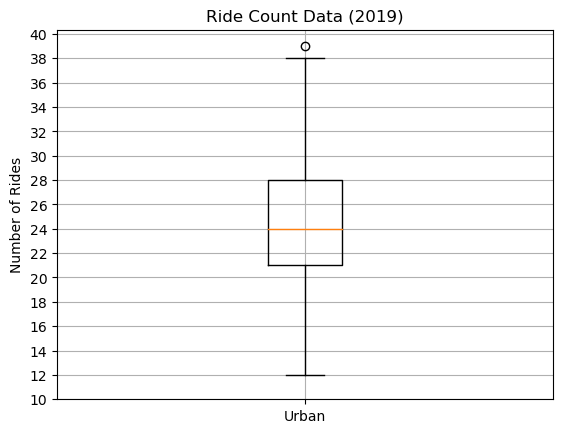

In [43]:
#Create a box and whisker plot using te urban cities ride count
x_labels=['Urban']

fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

#Add the title, y-axis label 
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')

#Set y-axis ticks
ax.set_yticks(np.arange(10,41,step=2.0))

#Add grid
ax.grid()

#Show plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

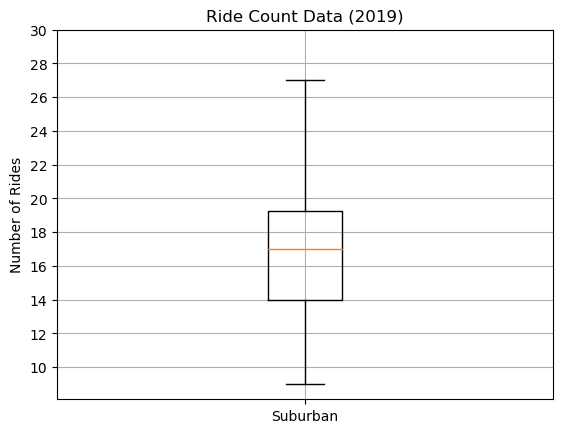

In [44]:
#Create a box and whisker plot with subruban ride count data
x_labels=['Suburban']

fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 31, step=2.0))
ax.grid()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

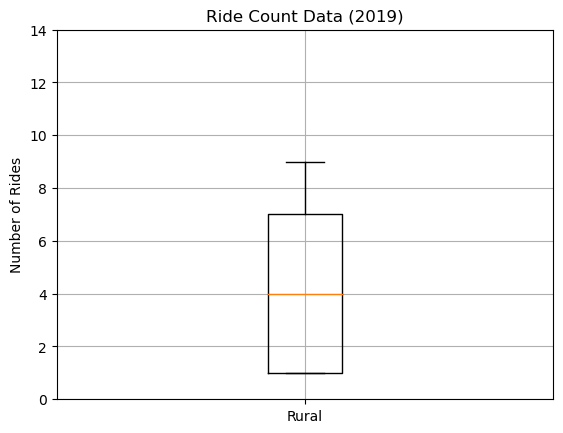

In [45]:
x_labels=['Rural']
fig, ax= plt.subplots()

ax.boxplot(rural_driver_count, labels=x_labels)

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0,16,step=2.0))
ax.grid()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

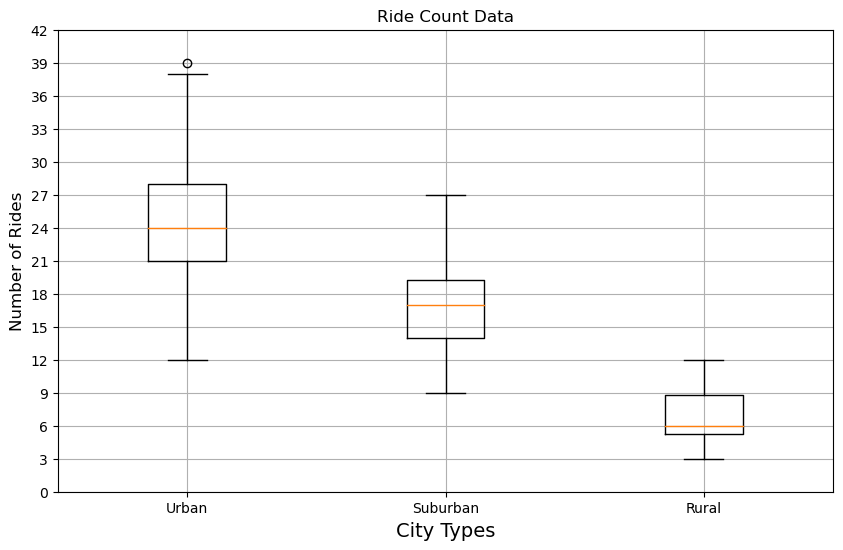

In [46]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels=['Urban','Suburban','Rural']
ride_count_data=[urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax= plt.subplots(figsize=(10,6))
ax.boxplot(ride_count_data, labels=x_labels)

#Set title
ax.set_title('Ride Count Data')

#set axis labels
ax.set_ylabel('Number of Rides', fontsize='12')
ax.set_xlabel('City Types', fontsize='14')

#set y-axis tickers
ax.set_yticks(np.arange(0,45, step=3.0))

ax.grid()

#Save the figure
plt.savefig('Analysis/fig2.png')
plt.show

In [47]:
# Get the city that matches 39.
urban_city_outlier=urban_ride_count[urban_ride_count==39].index[0]
print(f'{urban_city_outlier} has the highest rider count.')

West Angela has the highest rider count.


Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

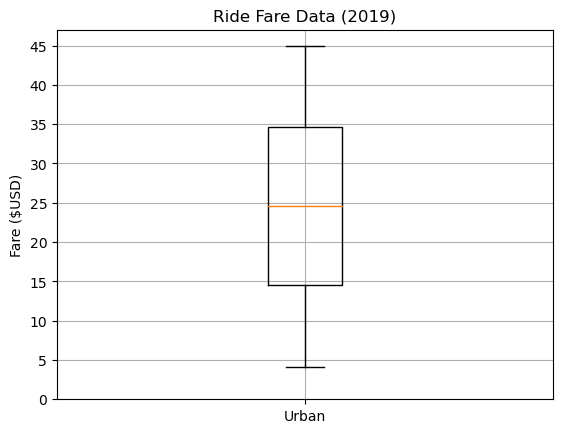

In [48]:
# Create a box-and-whisker plot for the urban fare data.
x_labels=['Urban']
fig, ax=plt.subplots()

ax.boxplot(urban_fares, labels=x_labels)

ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0, 50, step=5.0))

ax.grid()
plt.show


print('Summary Statistics')
urban_fares.describe()



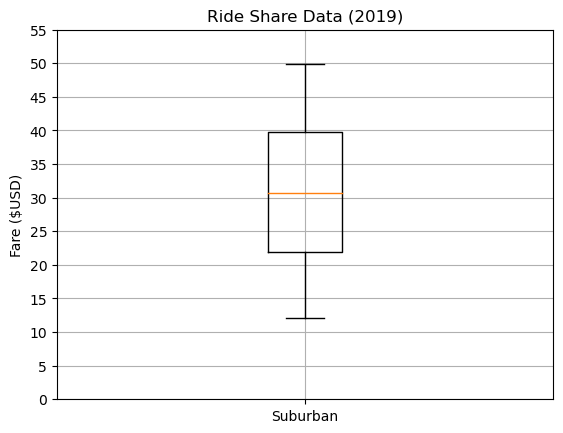

Summary Statistics:


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [49]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ['Suburban']
fig, ax = plt.subplots()

ax.boxplot(suburban_fares, labels=x_labels)

ax.set_title('Ride Share Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0,60, step=5.0))

ax.grid()

plt.show()

print('Summary Statistics:')
suburban_fares.describe()

<function matplotlib.pyplot.show(close=None, block=None)>

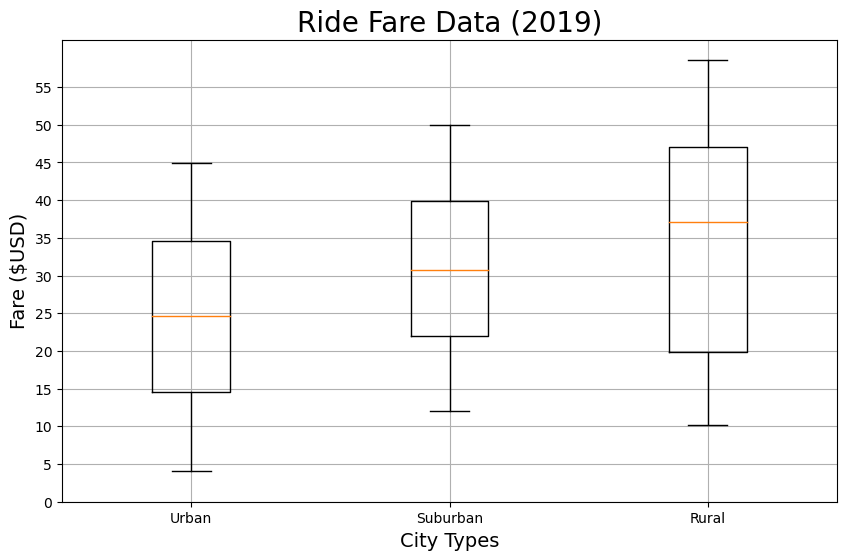

In [50]:
x_labels=['Urban', 'Suburban', 'Rural']
total_fare_data=[urban_fares, suburban_fares, rural_fares]
ytitle='City Types'

fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(total_fare_data, labels=x_labels)

ax.set_title('Ride Fare Data (2019)', fontsize='20')
ax.set_ylabel('Fare ($USD)', fontsize='14')
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.set_xlabel(ytitle, fontsize='14')

ax.grid()

plt.savefig('Analysis/Fig3.png')
plt.show

Summary Statistics:


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

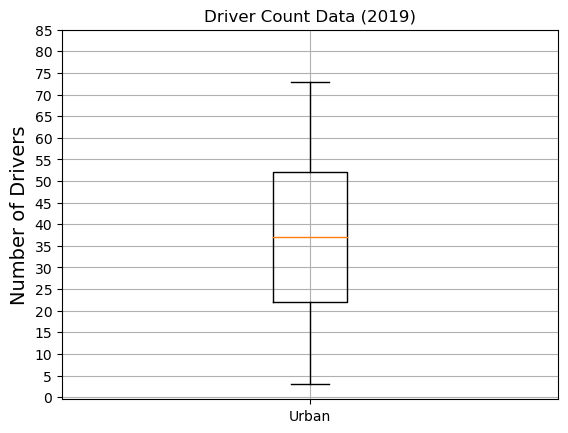

In [51]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels=['Urban']

fig, ax = plt.subplots()
ax.boxplot(urban_driver_count, labels=x_labels)

ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers', fontsize='14')
ax.set_yticks(np.arange(0,86, step=5.0))

ax.grid()
plt.show

print('Summary Statistics:')
urban_driver_count.describe()

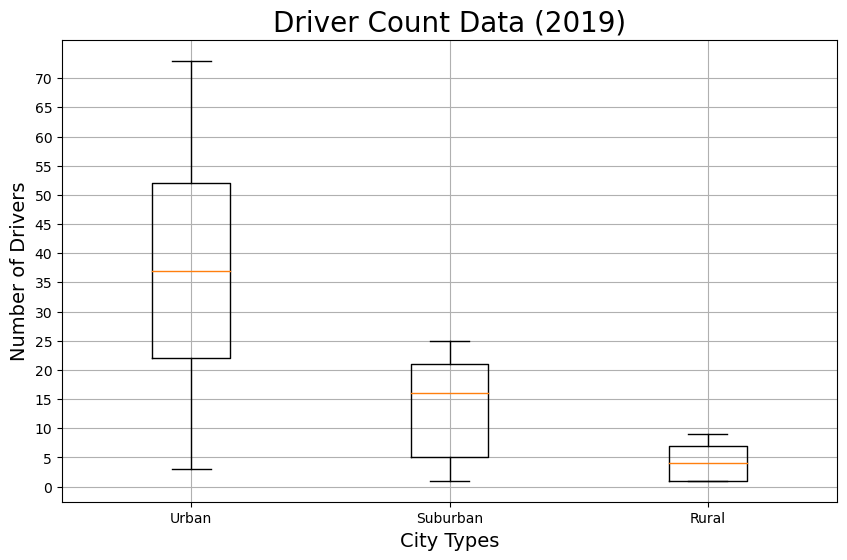

In [52]:
#Create a box-and-whisker plot that has all three city types' driver count data in one box-and-whisker plot
#Create variables to name data on plot
x_labels=['Urban', 'Suburban', 'Rural']
#create a list of all the driver count dataframes for urban, suburban and rural areas
driver_count_data=[urban_driver_count, suburban_driver_count, rural_driver_count]
xtitle='City Types'

fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(driver_count_data, labels=x_labels)

ax.set_title('Driver Count Data (2019)',fontsize='20')
ax.set_ylabel('Number of Drivers', fontsize='14')
ax.set_xlabel(xtitle, fontsize='14')
ax.set_yticks(np.arange(0, 75, step=5.0))

ax.grid()

plt.savefig('Analysis/Fig4.png')
plt.show()




In [53]:
## Get the sum of the fares for each city type.
sum_fares_by_type=pyber_data_df.groupby('type').sum()[['fare']]
sum_fares_by_type

,fare
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [54]:
# Get the sum of all the fares.
total_fares=ride_data_df.sum()['fare']
total_fares

63538.64

In [60]:
# Calculate the percentage of fare for each city type.
type_percents=100*pyber_data_df.groupby(['type']).sum()['fare']/pyber_data_df['fare'].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

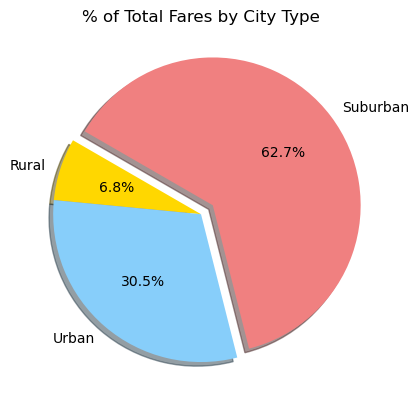

In [67]:
# Build the percentage of fares by city type pie chart.
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
city_type=['Rural','Urban','Suburban']

#Build Pie Chart
plt.pie(type_percents, 
        labels=city_type,
       explode = [0,0,0.1],
        colors=['gold', 'lightskyblue', 'lightcoral'],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
#Create title
plt.title('% of Total Fares by City Type')
#change font size
mpl.rcParams['font.size']=14
#save figure
plt.savefig('Analysis/Fig5.png')
plt.show()

In [73]:
ride_percents=100*pyber_data_df.groupby(['type']).count()['ride_id']/pyber_data_df['ride_id'].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

In [ ]:
city_type=['Rural','Urban','Suburban']

#Build Pie Chart
plt.pie(ride_percents, 
        labels=city_type,
       explode = [0,0,0.1],
        colors=['gold', 'lightskyblue', 'lightcoral'],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
#Create title
plt.title('% of Total Fares by City Type')
#change font size
mpl.rcParams['font.size']=14
#save figure
plt.savefig('Analysis/Fig5.png')
plt.show()